### This script contains:

#### 1. Import libraries & dataset
#### 2. Initial Scatterplot
#### 3. Splitting out some Month Subsets
#### 4. Subset Scatterplot
#### 5. Reshaping the Variables - December
#### 6. Creating Training and Test sets - December
#### 7. Regression Line Scatterplot - December
#### 8. Predicted v Actual comparision - December


## 1. Import libraries & dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
#Ensuring that the graphs you create are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

In [4]:
#Folder path into usable string
path = r'C:\Users\willm\Dropbox\1 Data Analytics Course\1 New York Citibike Hire'

In [5]:
#Import Hire Dataset
NYB2020_1day = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'NYB2020_1dayScript3.pkl'))

## 2. Initial Scatterplot

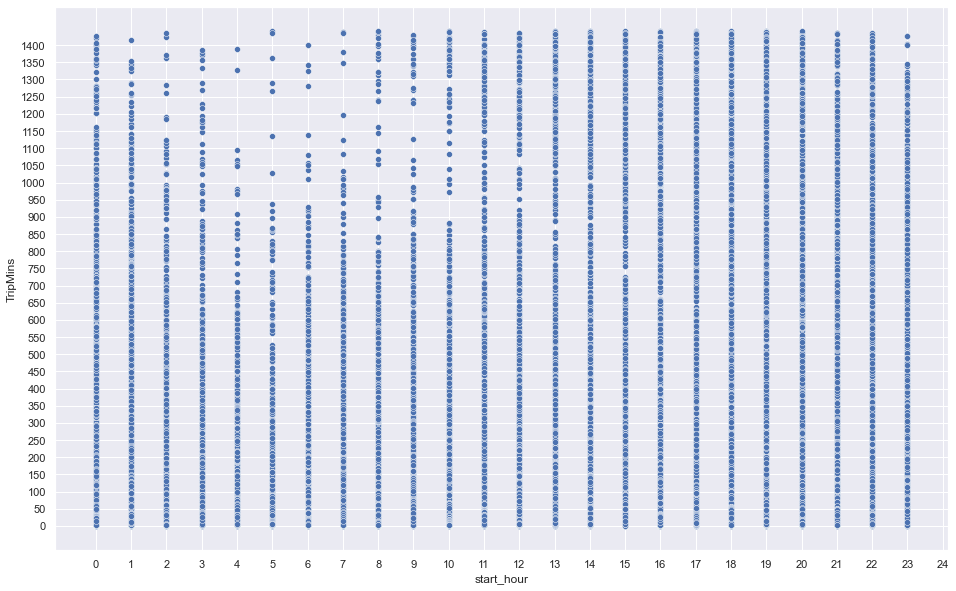

Wall time: 21.7 s


In [7]:
%%time
sns.set(rc={"figure.figsize":(16, 10)})
NYB2020_1daysplot = sns.scatterplot(x = 'start_hour', y = 'TripMins', data = NYB2020_1day)
plt.xticks(np.arange(0, 25, 1))
plt.yticks(np.arange(0, 1450, 50))
plt.show()

### I am 100% aware that each of those dots represent 1 or more times a bike was hired at a certain hour, for a certain length of time - during the WHOLE year!

## 3. Splitting out some Month Subsets

In [8]:
NYB2020_1dayDec = NYB2020_1day[NYB2020_1day['month']=='December']

In [9]:
NYB2020_1dayApr = NYB2020_1day[NYB2020_1day['month']=='April']

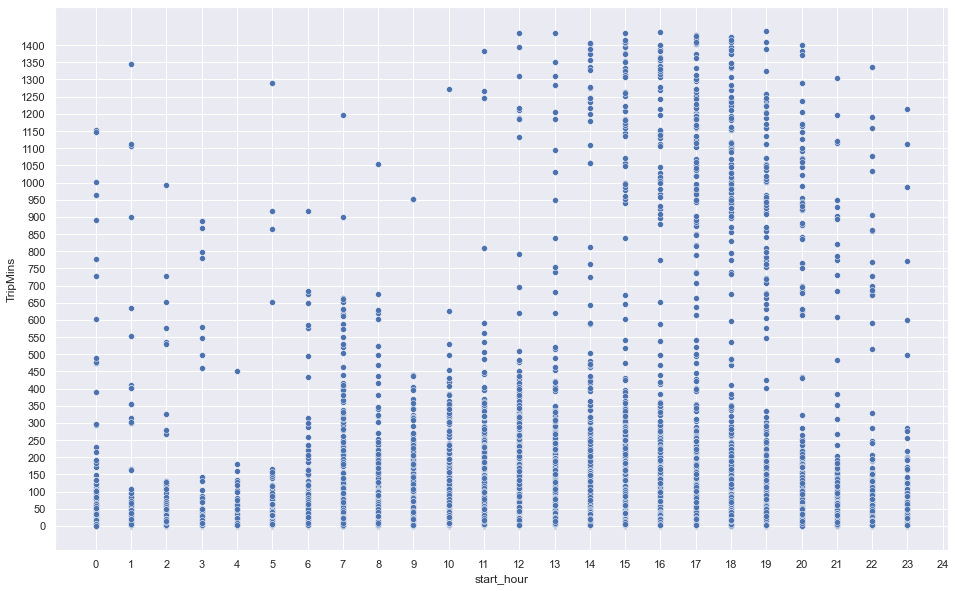

Wall time: 1.01 s


In [10]:
%%time
sns.set(rc={"figure.figsize":(16, 10)})
NYB2020_1dayAPRsplot = sns.scatterplot(x = 'start_hour', y = 'TripMins', data = NYB2020_1dayApr)
plt.xticks(np.arange(0, 25, 1))
plt.yticks(np.arange(0, 1450, 50))
plt.show()

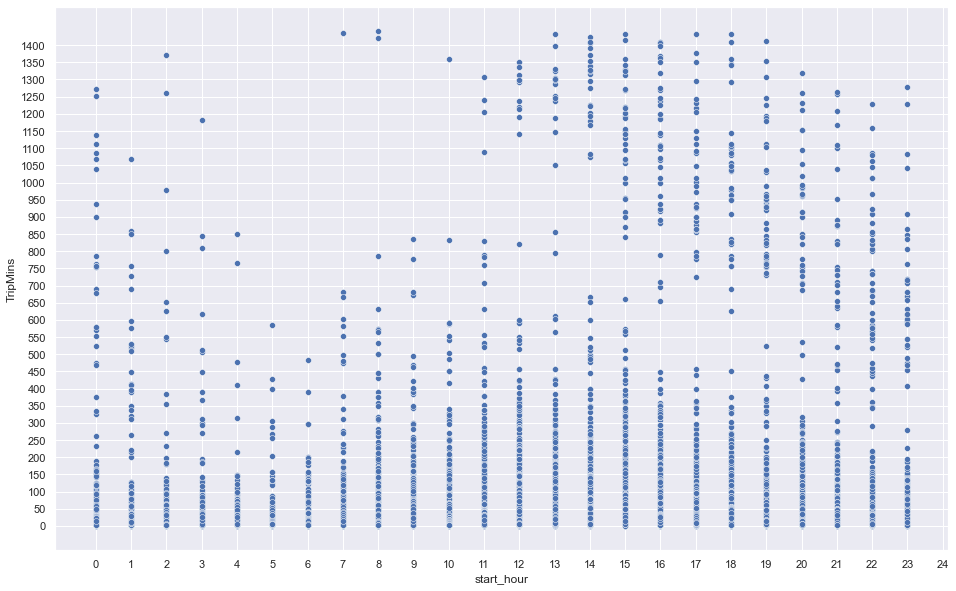

Wall time: 1.45 s


In [11]:
%%time
sns.set(rc={"figure.figsize":(16, 10)})
NYB2020_1dayDECsplot = sns.scatterplot(x = 'start_hour', y = 'TripMins', data = NYB2020_1dayDec)
plt.xticks(np.arange(0, 25, 1))
plt.yticks(np.arange(0, 1450, 50))
plt.show()

### Insights and Hypothesis
#### Looking at the Scatterplot, it seems that people start taking longer hires (over 650 minutes), after 11am.

#### Hypothesis: The later in the day, the more longer trips are taken.

## 4. Subset Scatterplot

In [16]:
#Splitting out the trips that exceed 650 minutes - APRIL
NYB2020_Apr650trip =  NYB2020_1dayApr[NYB2020_1dayApr['TripMins']>=650]

In [17]:
#Splitting out the trips that exceed 650 minutes - DECEMBER
NYB2020_Dec650trip =  NYB2020_1dayDec[NYB2020_1dayDec['TripMins']>=650]

In [18]:
#Checking the number of entries
NYB2020_Apr650trip.shape

(449, 31)

In [19]:
NYB2020_Dec650trip.shape

(382, 31)

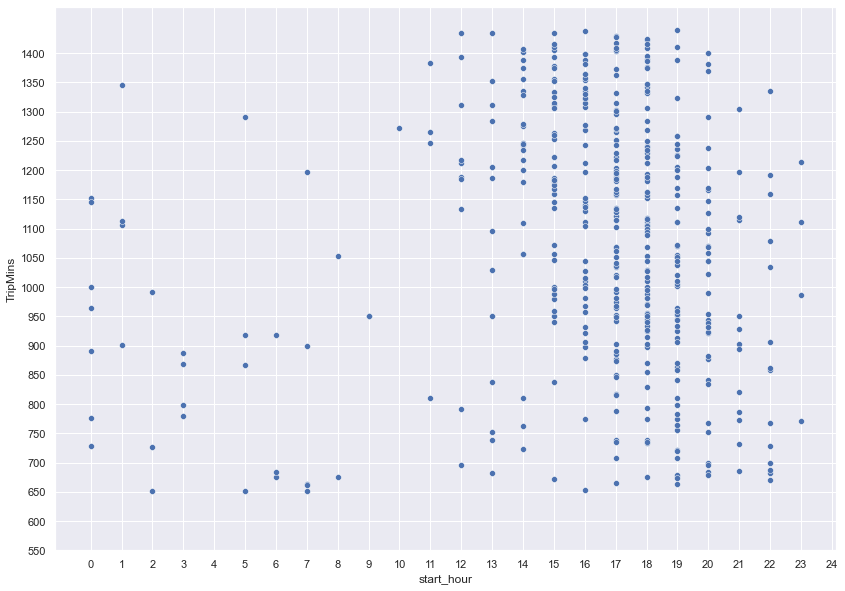

In [21]:
#Scatterplot to show what the split out April dataset looks like
sns.set(rc={"figure.figsize":(14, 10)})
NYB2020_Apr650tripsplot = sns.scatterplot(x = 'start_hour', y = 'TripMins', data = NYB2020_Apr650trip)
plt.xticks(np.arange(0, 25, 1))
plt.yticks(np.arange(600, 1450, 50))
plt.show()

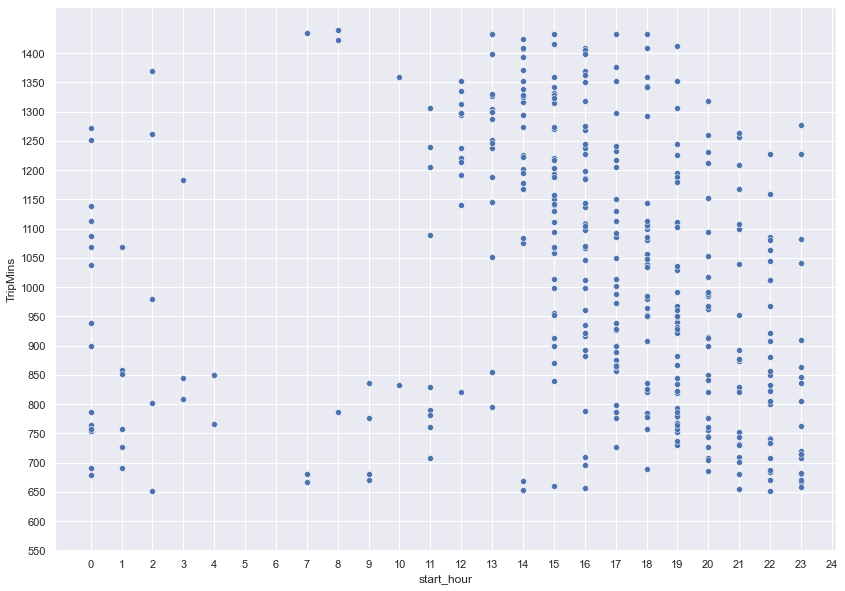

In [22]:
#Scatterplot to show what the split out December dataset looks like
sns.set(rc={"figure.figsize":(14, 10)})
NYB2020_Dec650tripsplot = sns.scatterplot(x = 'start_hour', y = 'TripMins', data = NYB2020_Dec650trip)
plt.xticks(np.arange(0, 25, 1))
plt.yticks(np.arange(600, 1450, 50))
plt.show()

## 5. Reshaping the Variables - December

In [31]:
#Reshaping the variables into NumPy arrays and putting them into separate objects
X = NYB2020_Dec650trip['start_hour'].values.reshape(-1,1)
y = NYB2020_Dec650trip['TripMins'].values.reshape(-1,1)

In [32]:
X

array([[ 0],
       [ 8],
       [12],
       [13],
       [15],
       [16],
       [17],
       [18],
       [18],
       [19],
       [19],
       [20],
       [20],
       [23],
       [ 0],
       [11],
       [16],
       [17],
       [17],
       [18],
       [19],
       [19],
       [19],
       [20],
       [22],
       [23],
       [ 2],
       [ 9],
       [ 9],
       [12],
       [12],
       [14],
       [15],
       [16],
       [16],
       [17],
       [18],
       [20],
       [21],
       [22],
       [14],
       [16],
       [17],
       [18],
       [ 0],
       [ 2],
       [14],
       [14],
       [14],
       [15],
       [15],
       [16],
       [16],
       [16],
       [16],
       [16],
       [17],
       [18],
       [18],
       [19],
       [20],
       [20],
       [21],
       [21],
       [21],
       [22],
       [22],
       [23],
       [23],
       [23],
       [ 0],
       [ 1],
       [ 1],
       [ 1],
       [11],
       [11],
       [12],

In [33]:
y

array([[1038],
       [1440],
       [1237],
       [1146],
       [1150],
       [ 961],
       [ 889],
       [1344],
       [ 820],
       [ 940],
       [ 927],
       [ 745],
       [ 755],
       [ 666],
       [ 764],
       [ 790],
       [ 695],
       [1432],
       [ 927],
       [ 979],
       [1030],
       [ 819],
       [ 730],
       [ 760],
       [1086],
       [1082],
       [1262],
       [ 776],
       [ 671],
       [1294],
       [1221],
       [1225],
       [1433],
       [ 710],
       [1187],
       [ 726],
       [ 836],
       [ 743],
       [1168],
       [ 652],
       [1202],
       [ 916],
       [1049],
       [1342],
       [ 757],
       [ 801],
       [1339],
       [1425],
       [1372],
       [1331],
       [1220],
       [1237],
       [1046],
       [1227],
       [1245],
       [1268],
       [1086],
       [1099],
       [1081],
       [ 866],
       [1053],
       [ 707],
       [ 824],
       [ 892],
       [1100],
       [ 908],
       [ 7

## 6. Creating Training and Test sets - December

In [34]:
#Splitting the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [35]:
#Creating a regression object
regression = LinearRegression()

In [36]:
#Fit the regression object onto the training set
regression.fit(X_train, y_train) #Training the model

LinearRegression()

In [37]:
#Predict the values of y using X
#Using the model on the test data set to predict some y values and see how accurate they are
y_predicted = regression.predict(X_test) 

## 7. Regression Line Scatterplot - December

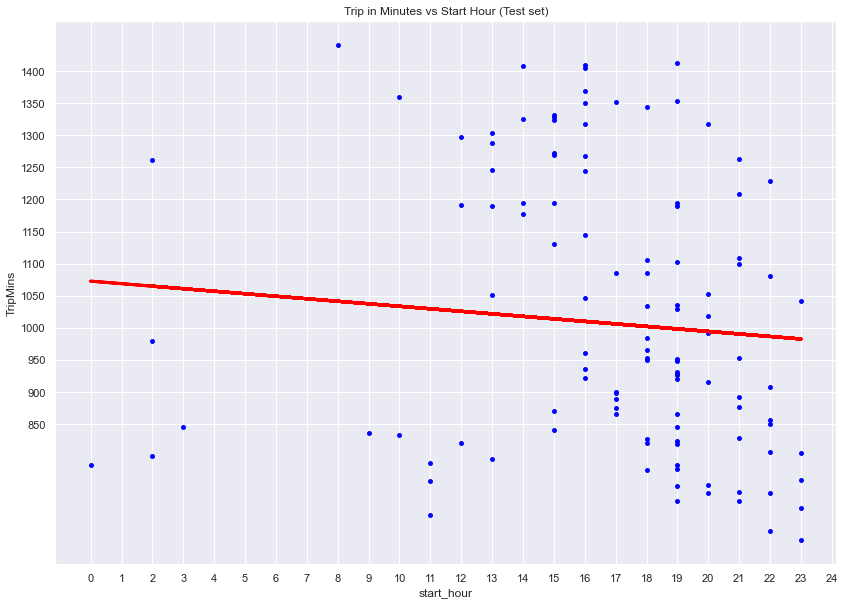

In [38]:
#Creating a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Trip in Minutes vs Start Hour (Test set)')
plot_test.xlabel('start_hour')
plot_test.ylabel('TripMins')
plot_test.xticks(np.arange(0, 25, 1))
plot_test.yticks(np.arange(850, 1450, 50))
plot_test.show()

### Interpretation
#### This does not look like a match at all.

In [39]:
#Checking the accuracy of the model - mean squared error and R2
#Creating objects that contain the model summary statistics
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [40]:
#Printing the model's summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-3.91621093]]
Mean squared error:  45107.09638477288
R2 score:  0.02057728146975768


## 8. Predicted v Actual comparision - December

In [41]:
#Making a dataframe of y values and their predicted values to further see the performance of the model 
y_predicted

array([[1037.43615322],
       [1025.68752044],
       [1006.10646581],
       [1006.10646581],
       [ 998.27404396],
       [1013.93888766],
       [1021.77130951],
       [ 986.52541118],
       [1002.19025489],
       [1064.8496297 ],
       [1002.19025489],
       [1064.8496297 ],
       [1029.60373137],
       [ 986.52541118],
       [ 990.44162211],
       [ 998.27404396],
       [ 986.52541118],
       [1002.19025489],
       [1010.02267674],
       [ 986.52541118],
       [1013.93888766],
       [1002.19025489],
       [ 998.27404396],
       [1006.10646581],
       [ 998.27404396],
       [ 994.35783304],
       [ 986.52541118],
       [1017.85509859],
       [ 982.60920026],
       [1010.02267674],
       [1021.77130951],
       [1006.10646581],
       [1041.35236414],
       [1010.02267674],
       [ 994.35783304],
       [ 994.35783304],
       [ 990.44162211],
       [1025.68752044],
       [ 982.60920026],
       [ 990.44162211],
       [ 998.27404396],
       [1064.849

In [42]:
#Creating a dataframe comparing the actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,836,1037.436153
1,1191,1025.687520
2,865,1006.106466
3,1352,1006.106466
4,921,998.274044
5,1194,1013.938888
6,795,1021.771310
7,908,986.525411
8,1085,1002.190255
9,801,1064.849630


#### We can see, just by looking at the 4th entry (numbered 3 - with a difference of 350, which is over 25%) as an example, that there are some serious differences between the Actual and Predicted.